# Fishyscapes Static

In [43]:
import numpy as np
import os
from glob import glob
import matplotlib.pyplot as plt
from PIL import Image

In [48]:
# Overlay images
path="/Users/dadalto/github/datasets/datasets/fs_val_v3"
f_list=glob(path + "/*rgb.npz")
print(len(f_list))

images=[np.load(f)["rgb"].astype(int) for f in f_list]

30


In [52]:
# Base images
import re
IDS_FROM_FILENAME = re.compile(r"([0-9]+)_(.+)_labels.png")
def get_ids_from_labels_file(labels_file):
  '''Returns the ids (fishyscapes and cityscapes format) from the filename of a labels
  file. Used to associate a fishyscapes label file with the corresponding cityscapes
  image.

  Example:
    '0000_04_Maurener_Weg_8_000000_000030_labels.png' -> '0000', '04_Maurener_Weg_8_000000_000030'
  '''
  match = IDS_FROM_FILENAME.match(labels_file)
  return match.group(1), match.group(2)

In [54]:
get_ids_from_labels_file("0024_frankfurt_000001_030310_labels.png")
get_ids_from_labels_file("0000_04_Maurener_Weg_8_000000_000030_labels.png")

('0000', '04_Maurener_Weg_8_000000_000030')

In [ ]:
#   def _generate_examples(self, fishyscapes_path, base_images):
#     """Yields examples."""
#     for filename in tf.io.gfile.listdir(fishyscapes_path):
#       if filename.endswith('_labels.png'):
#         fs_id, cityscapes_id = _get_ids_from_labels_file(filename)
#         features = {
#           'image_id': fs_id,
#           'basedata_id': cityscapes_id,
#           'mask': path.join(fishyscapes_path, filename),
#         }
#         if self.builder_config.base_data == 'lost_and_found':
#           features['image_left'] = base_images[cityscapes_id]['image_left']
#           if self.builder_config.original_mask:
#             features['mask'] = base_images[cityscapes_id]['segmentation_label']
#         elif self.builder_config.base_data == 'cityscapes':
#           overlay_image = next(f for f in tf.io.gfile.listdir(fishyscapes_path)
#                                if f.startswith(fs_id) and f.endswith('rgb.npz'))
#           overlay_image = np.load(
#             path.join(fishyscapes_path, overlay_image))['rgb'].astype(int)
#           base_image = base_images[cityscapes_id]['image_left']
#           base_image = tf.image.decode_jpeg(tf.io.read_file(base_image), channels=3)
#           base_image = np.array(base_image).astype(int)
#           features['image_left'] = np.clip(base_image + overlay_image, 0, 255).astype('uint8')
#         yield fs_id, features

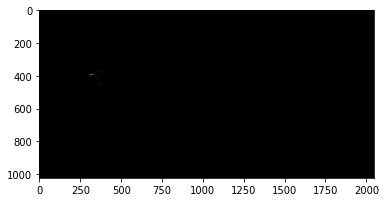

In [49]:
plt.ion()
plt.figure()
plt.imshow(np.clip(images[1], 0, 255))

In [42]:
images[0].shape

(1024, 2048, 3)

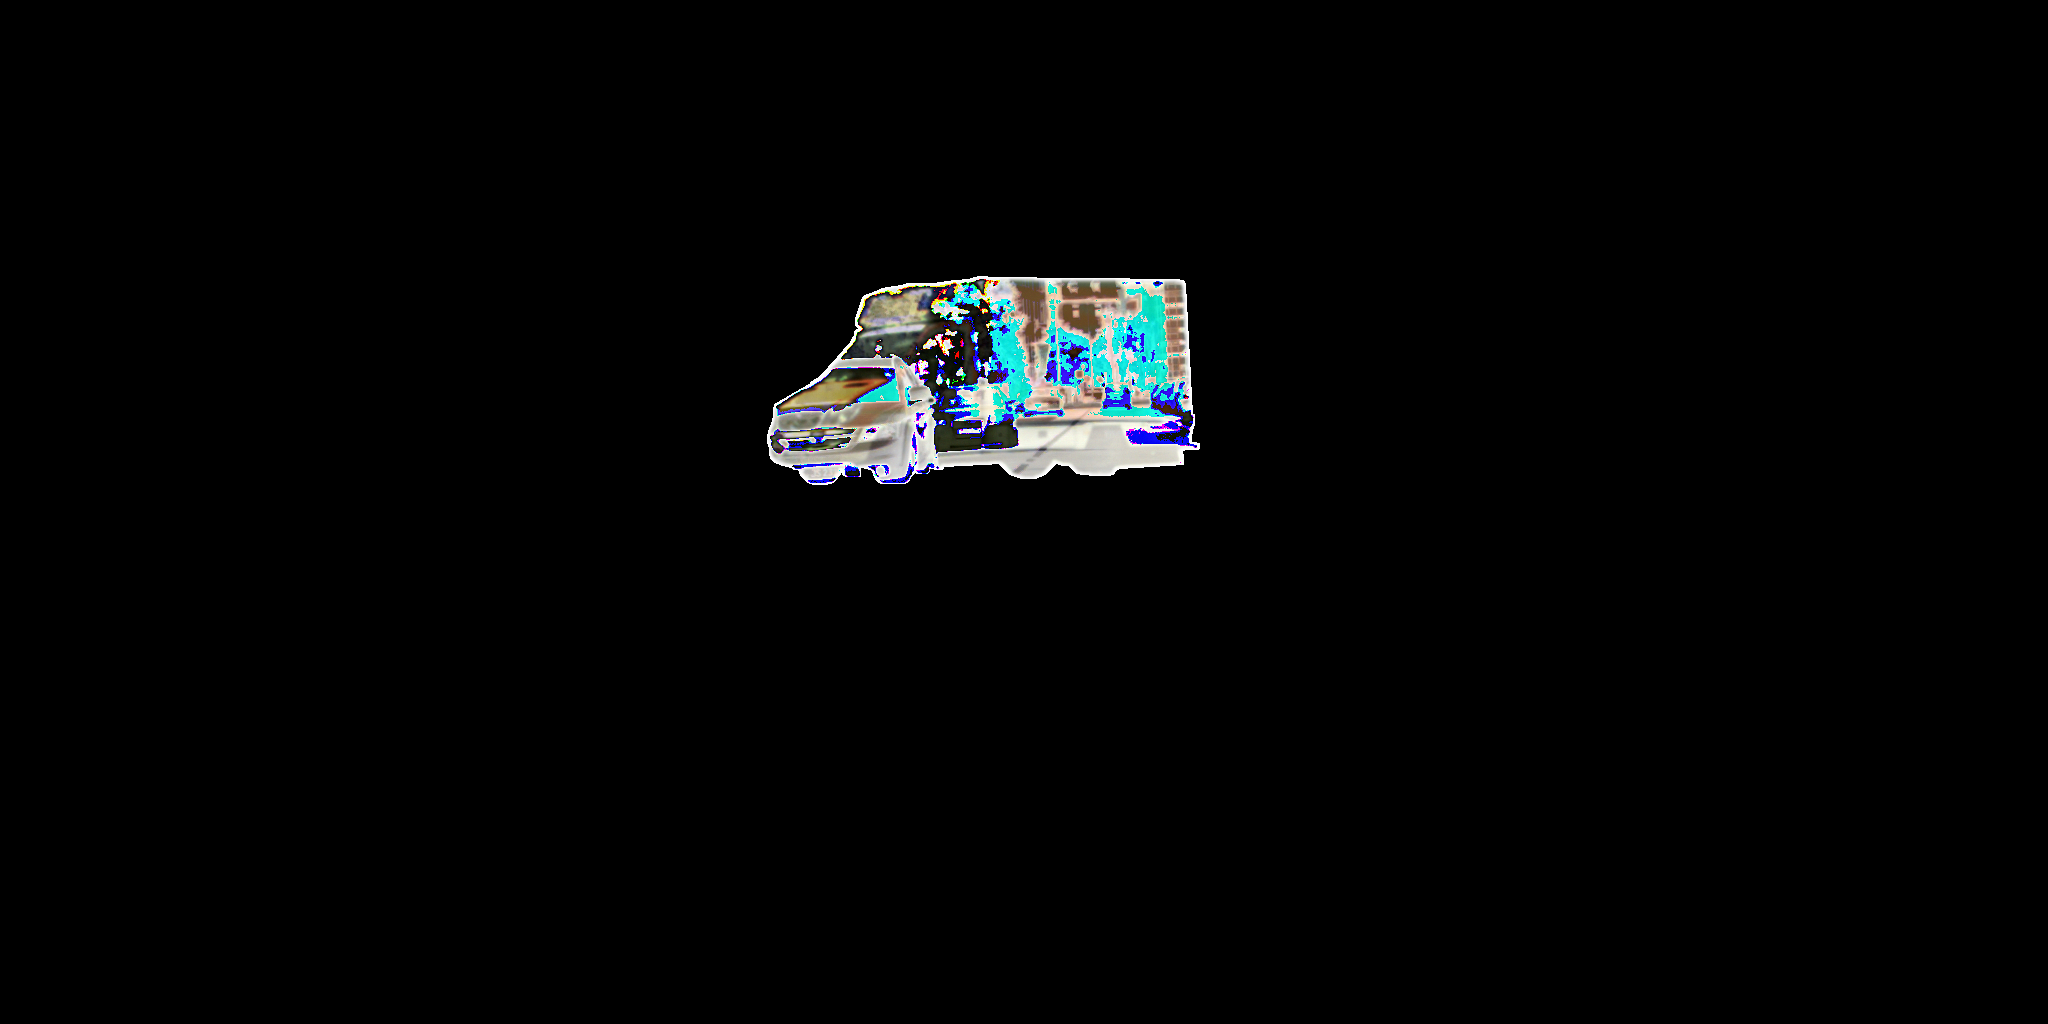

In [55]:
Image.fromarray(images[0].astype(np.uint8), 'RGB')

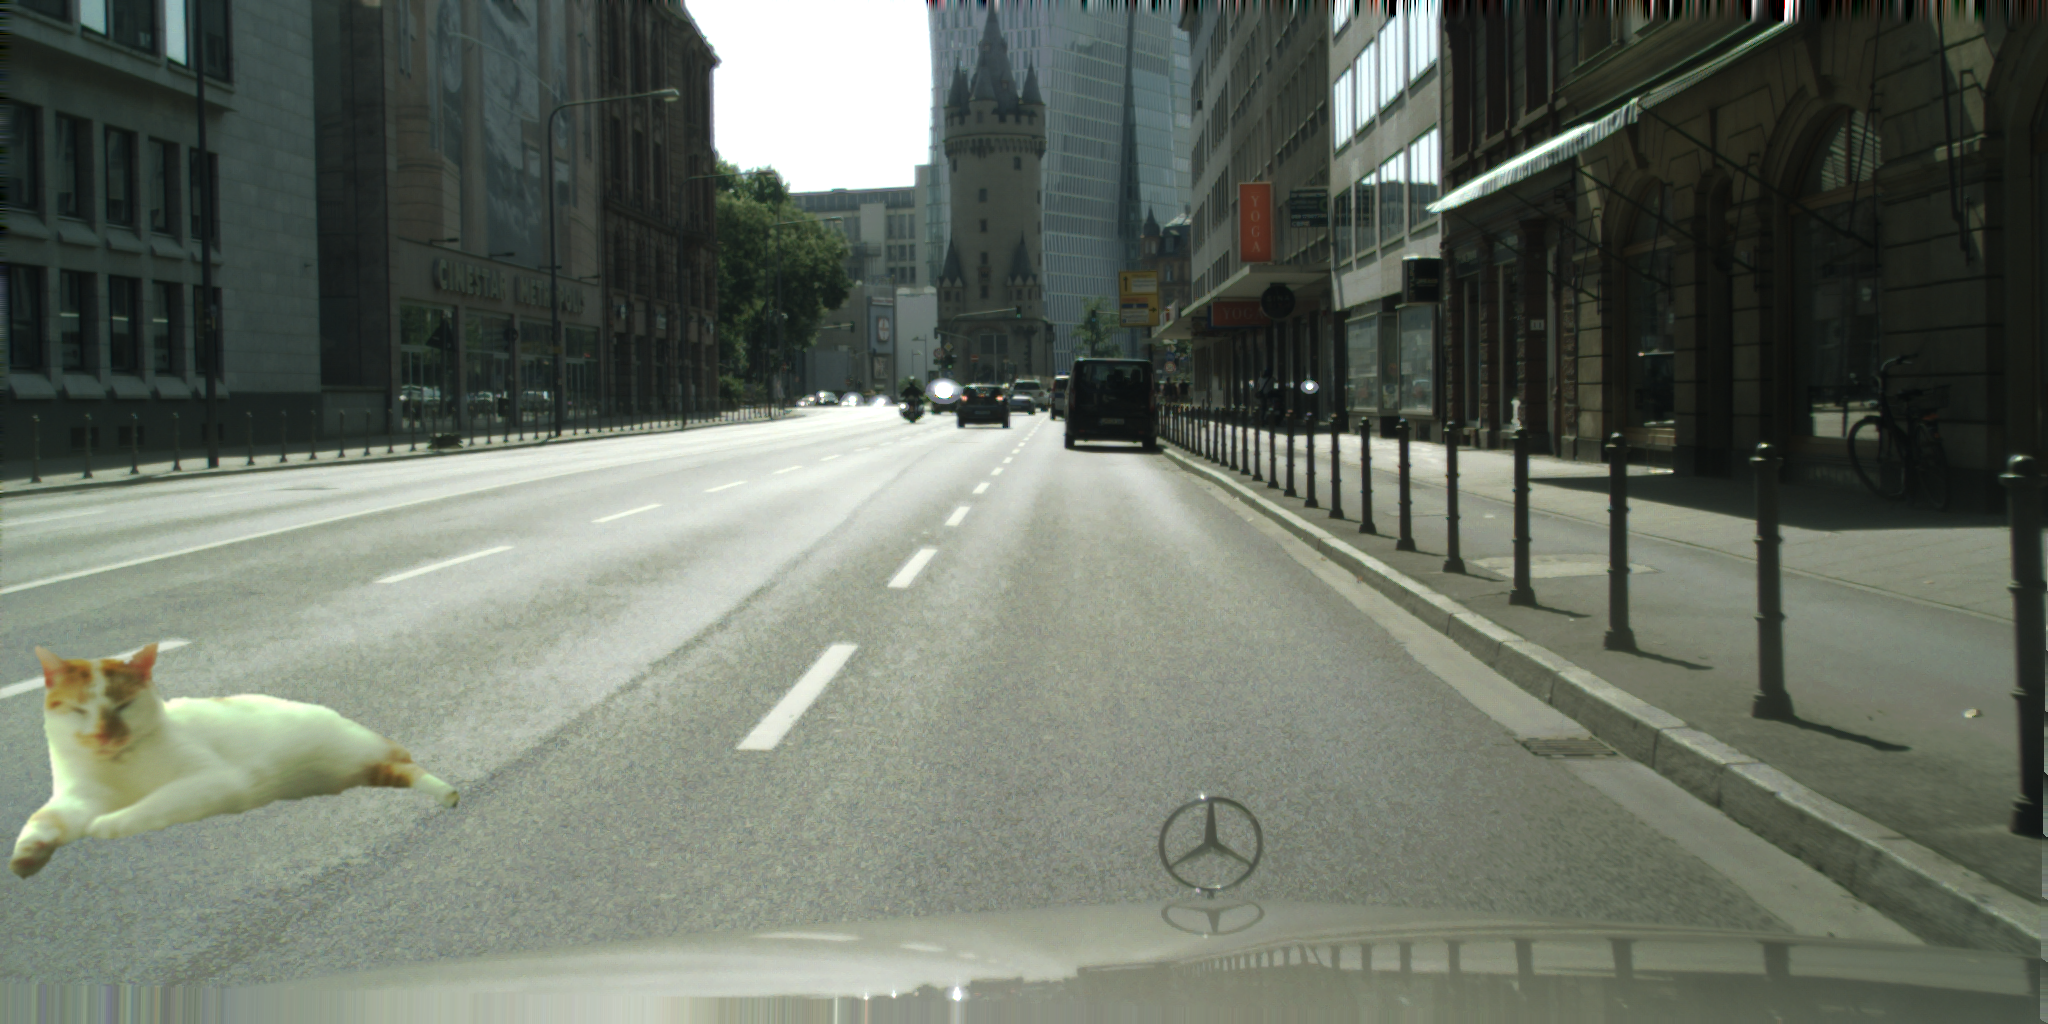

In [82]:
# CORRECT
from PIL import Image
import numpy as np

uid="000000_021667"
overlay_path=f"/Users/dadalto/github/datasets/datasets/fs_val_v3/0025_frankfurt_{uid}_rgb.npz"
base_path=f"/Users/dadalto/github/datasets/datasets/leftImg8bit_trainvaltest/leftImg8bit/val/frankfurt/frankfurt_{uid}_leftImg8bit.png"

overlay_image = np.load(overlay_path)["rgb"].astype(int)
base_image = np.array(Image.open(base_path)).astype(int)
image = np.clip(base_image + overlay_image, 0, 255).astype('uint8')

Image.fromarray(image, "RGB")


In [73]:
overlay_image.min(), overlay_image.shape, base_image.min(), base_image.shape

(-237, (1024, 2048, 3), 0, (1024, 2048, 3))